In [1]:
from matplotlib import pyplot as plt
import numpy as np
import csv

In [5]:
def isFloat(value):
        try:
            float(value)
            return True
        except ValueError:
            return False

In [6]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', color = 'black')

In [209]:
path_to_file = "/Users/zarko/Desktop/calibration.txt"
with open(path_to_file) as f:
    chromatogram = [
        tuple(map(float, line.strip().split())) 
            for line in f.readlines()
                if (line.strip() and all([isFloat(word) for word in line.strip().split()]))
        ]

In [210]:
chroms = np.array(chromatogram).T[1].reshape(10,961)
rtimes = np.array(chromatogram).T[0].reshape(10,961)

In [211]:
chroms_254 = chroms[range(0,10,2)]
chroms_220 = chroms[range(1,10,2)]

In [212]:
rtimes = rtimes[0]

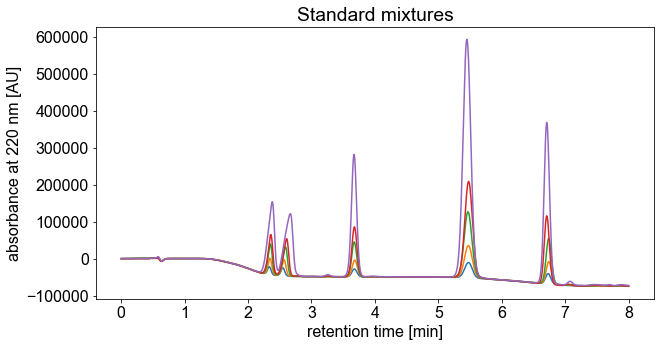

In [213]:
fig1 = plt.figure(figsize=(10,5))
for chrom in chroms_220:
    plt.plot(rtimes, chrom)
plt.xlabel('retention time [min]')
plt.ylabel('absorbance at 220 nm [AU]')
plt.title('Standard mixtures')

plt.savefig('/Users/zarko/Documents/zarkolab/projects/nickel_spiroindane/hplc_chromatograms_220.svg')
plt.savefig('/Users/zarko/Documents/zarkolab/projects/nickel_spiroindane/hplc_chromatograms_220.png')


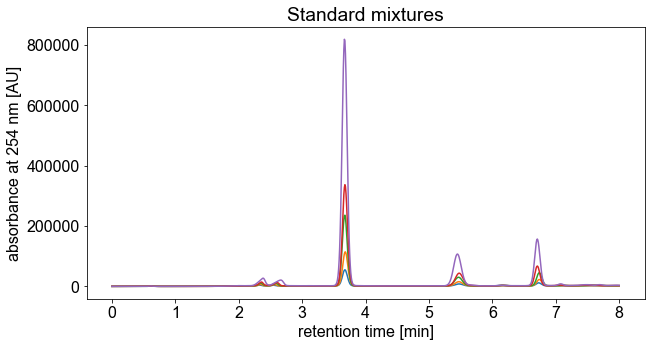

In [214]:
fig = plt.figure(figsize=(10,5))
for chrom in chroms_254:
    plt.plot(rtimes, chrom)
plt.xlabel('retention time [min]')
plt.ylabel('absorbance at 254 nm [AU]')
plt.title('Standard mixtures')
plt.savefig('/Users/zarko/Documents/zarkolab/projects/nickel_spiroindane/hplc_chromatograms_254.svg')
plt.savefig('/Users/zarko/Documents/zarkolab/projects/nickel_spiroindane/hplc_chromatograms_254.png')

In [147]:
calibration_curves = {}
compounds = ['anti-spiroindane', 'syn-spiroindane', 'phenylpyrroline', '2-bromophenyl pyrroline', '2-ethylphenyl pyrroline']
concs = [0.3125, 0.625, 1.25, 2.5, 5]

In [148]:
calibration_curves[compounds[0]]=[82979, 182151, 377206, 539182, 1389137]
calibration_curves[compounds[1]]=[92714, 200681, 409790, 581591, 1493618]
calibration_curves[compounds[2]]=[318337, 677760, 1377390, 1985313, 4904223]
calibration_curves[compounds[3]]=[61556, 130898, 268108, 388217, 970734]
calibration_curves[compounds[4]]=[60801, 131346, 268067, 390826, 973367]


In [149]:
calibration_curves['syn-spiroindane']

[92714, 200681, 409790, 581591, 1493618]

In [82]:
calibration_curves[compounds[1]]

[92714, 200681, 409790, 581591, 1493618]

In [215]:
concs

[0.3125, 0.625, 1.25, 2.5, 5]

In [163]:
#get slopes of calibration curves
slopes =[]
for i in range(0, len(compounds)):
    slopes.append(np.reciprocal(np.dot(np.array(concs), np.array(concs)))*np.dot(np.array(concs), calibration_curves[compounds[i]]))

In [164]:
slopes

[267408.8258064516,
 287942.30615835777,
 952806.9348973607,
 187995.4392961877,
 188586.42580645162]

In [18]:
from matplotlib import rcParams
rcParams['font.sans-serif'] = "arial"
rcParams.update({'font.size': 16})
rcParams['legend.loc'] = 'upper left'

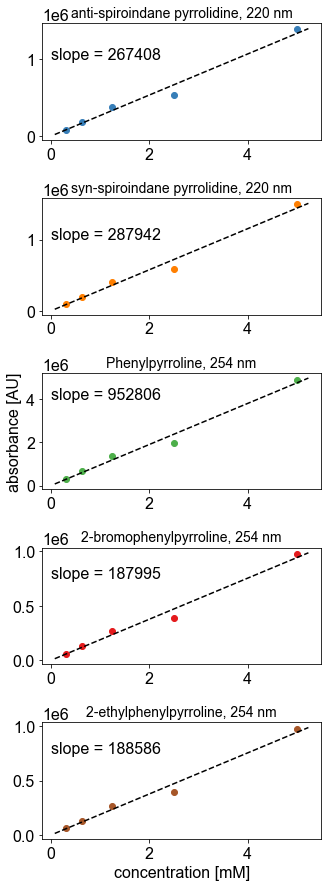

In [216]:
fig, axs = plt.subplots(5,1, figsize=(5, 15), sharex=True, squeeze=False)
plt.subplot(511)
plt.plot(concs, calibration_curves[compounds[0]], 'o', color = '#377eb8')
plt.title('anti-spiroindane pyrrolidine, 220 nm', size = 14)
abline(slopes[0],0)
plt.text(0,1e6, f'slope = {int(slopes[0])}')
plt.subplot(512)
plt.plot(concs, calibration_curves[compounds[1]], 'o', color = '#ff7f00')
plt.title('syn-spiroindane pyrrolidine, 220 nm', size = 14)
abline(slopes[1],0)
plt.text(0,1e6, f'slope = {int(slopes[1])}')

plt.subplot(513)
plt.plot(concs, calibration_curves[compounds[2]], 'o', color = '#4daf4a')
plt.title('Phenylpyrroline, 254 nm', size = 14)
abline(slopes[2],0)
plt.text(0,4e6, f'slope = {int(slopes[2])}')

plt.ylabel('absorbance [AU]')

plt.subplot(514)
plt.plot(concs, calibration_curves[compounds[3]], 'o', color = '#e41a1c')
plt.title('2-bromophenylpyrroline, 254 nm', size = 14)
abline(slopes[3],0)
plt.text(0,0.75e6, f'slope = {int(slopes[3])}')

plt.subplot(515)
plt.plot(concs, calibration_curves[compounds[4]], 'o', color = '#a65628')
plt.title('2-ethylphenylpyrroline, 254 nm', size = 14)
abline(slopes[4],0)
plt.text(0,0.75e6, f'slope = {int(slopes[4])}')

plt.xlabel('concentration [mM]')
plt.subplots_adjust(hspace=0.5,
                    wspace=0)

plt.savefig('/Users/zarko/Documents/zarkolab/projects/nickel_spiroindane/individual_calibration_curves.svg')


In [21]:
path_to_file2 = "/Users/zarko/Documents/zarkolab/projects/nickel_spiroindane/centered_weights.txt"
centered_weights = []
with open(path_to_file2) as f:
    reader = csv.reader(f)
    for row in reader:
        centered_weights.append([float(i) for i in row])
centered_weights = np.array(centered_weights).T

In [22]:
compounds = ['anti', 'syn', 'phenyl', '2-bromophenyl', '2-ethyl']

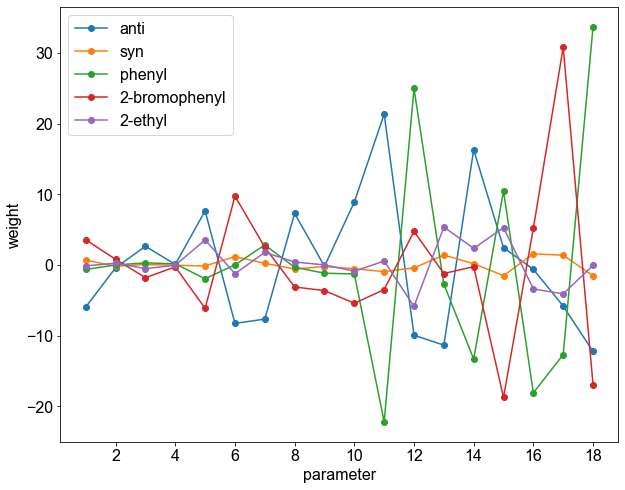

In [23]:
from matplotlib.ticker import MaxNLocator
fig2 = plt.figure(figsize=(10,8))
ax = plt.axes()
for i in range(0, len(centered_weights)-1):
    plt.plot(range(1,19), centered_weights[i], marker = 'o')
plt.legend(compounds)
plt.xlabel('parameter')
plt.ylabel('weight')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.savefig('/Users/zarko/Documents/zarkolab/projects/nickel_spiroindane/weights_update.svg')


In [42]:
centered_weights.keys()

dict_keys(['anti', 'syn', 'protio quench', 'alkylation product', 'reactant'])